# Stability of the Grid System

### 1. Description of the variables

##### 1.1 Predictive features:
1. 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
2. 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real  value within the range -2.0 to -0.5 for consumers {'p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = -(p2 +p3 + p4);
3. 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma')

##### 1.2 Dependent variables:
1. 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
2. 'stabf': a categorical (binary) label ('stable' or 'unstable').


Because of the direct relationship between 'stab' and 'stabf'('stabf' = 'stable' if 'stab' <=0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification)

### 2. Exploratory Data Analysis

##### 2.1 Importing some required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### 2.2 Importing the dataset

In [2]:
df=pd.read_csv('Data_for_UCI_named.csv')

##### 2.3 Checking the head of the dataframe

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


##### 2.4 checking the info of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


##### 2.5 Dropping the 'stab' column

In [5]:
df=df.drop('stab',axis=1)

##### 2.6 checking if there is any missing value in the dataframe

In [6]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

##### 2.7 Checking the value count of each of the 'stabf'  column 

In [7]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

##### 2.8 Making the heatmap of the correlation between the independent variables

Text(0.5, 1, 'Heat Map showing the correlation between the independent variables')

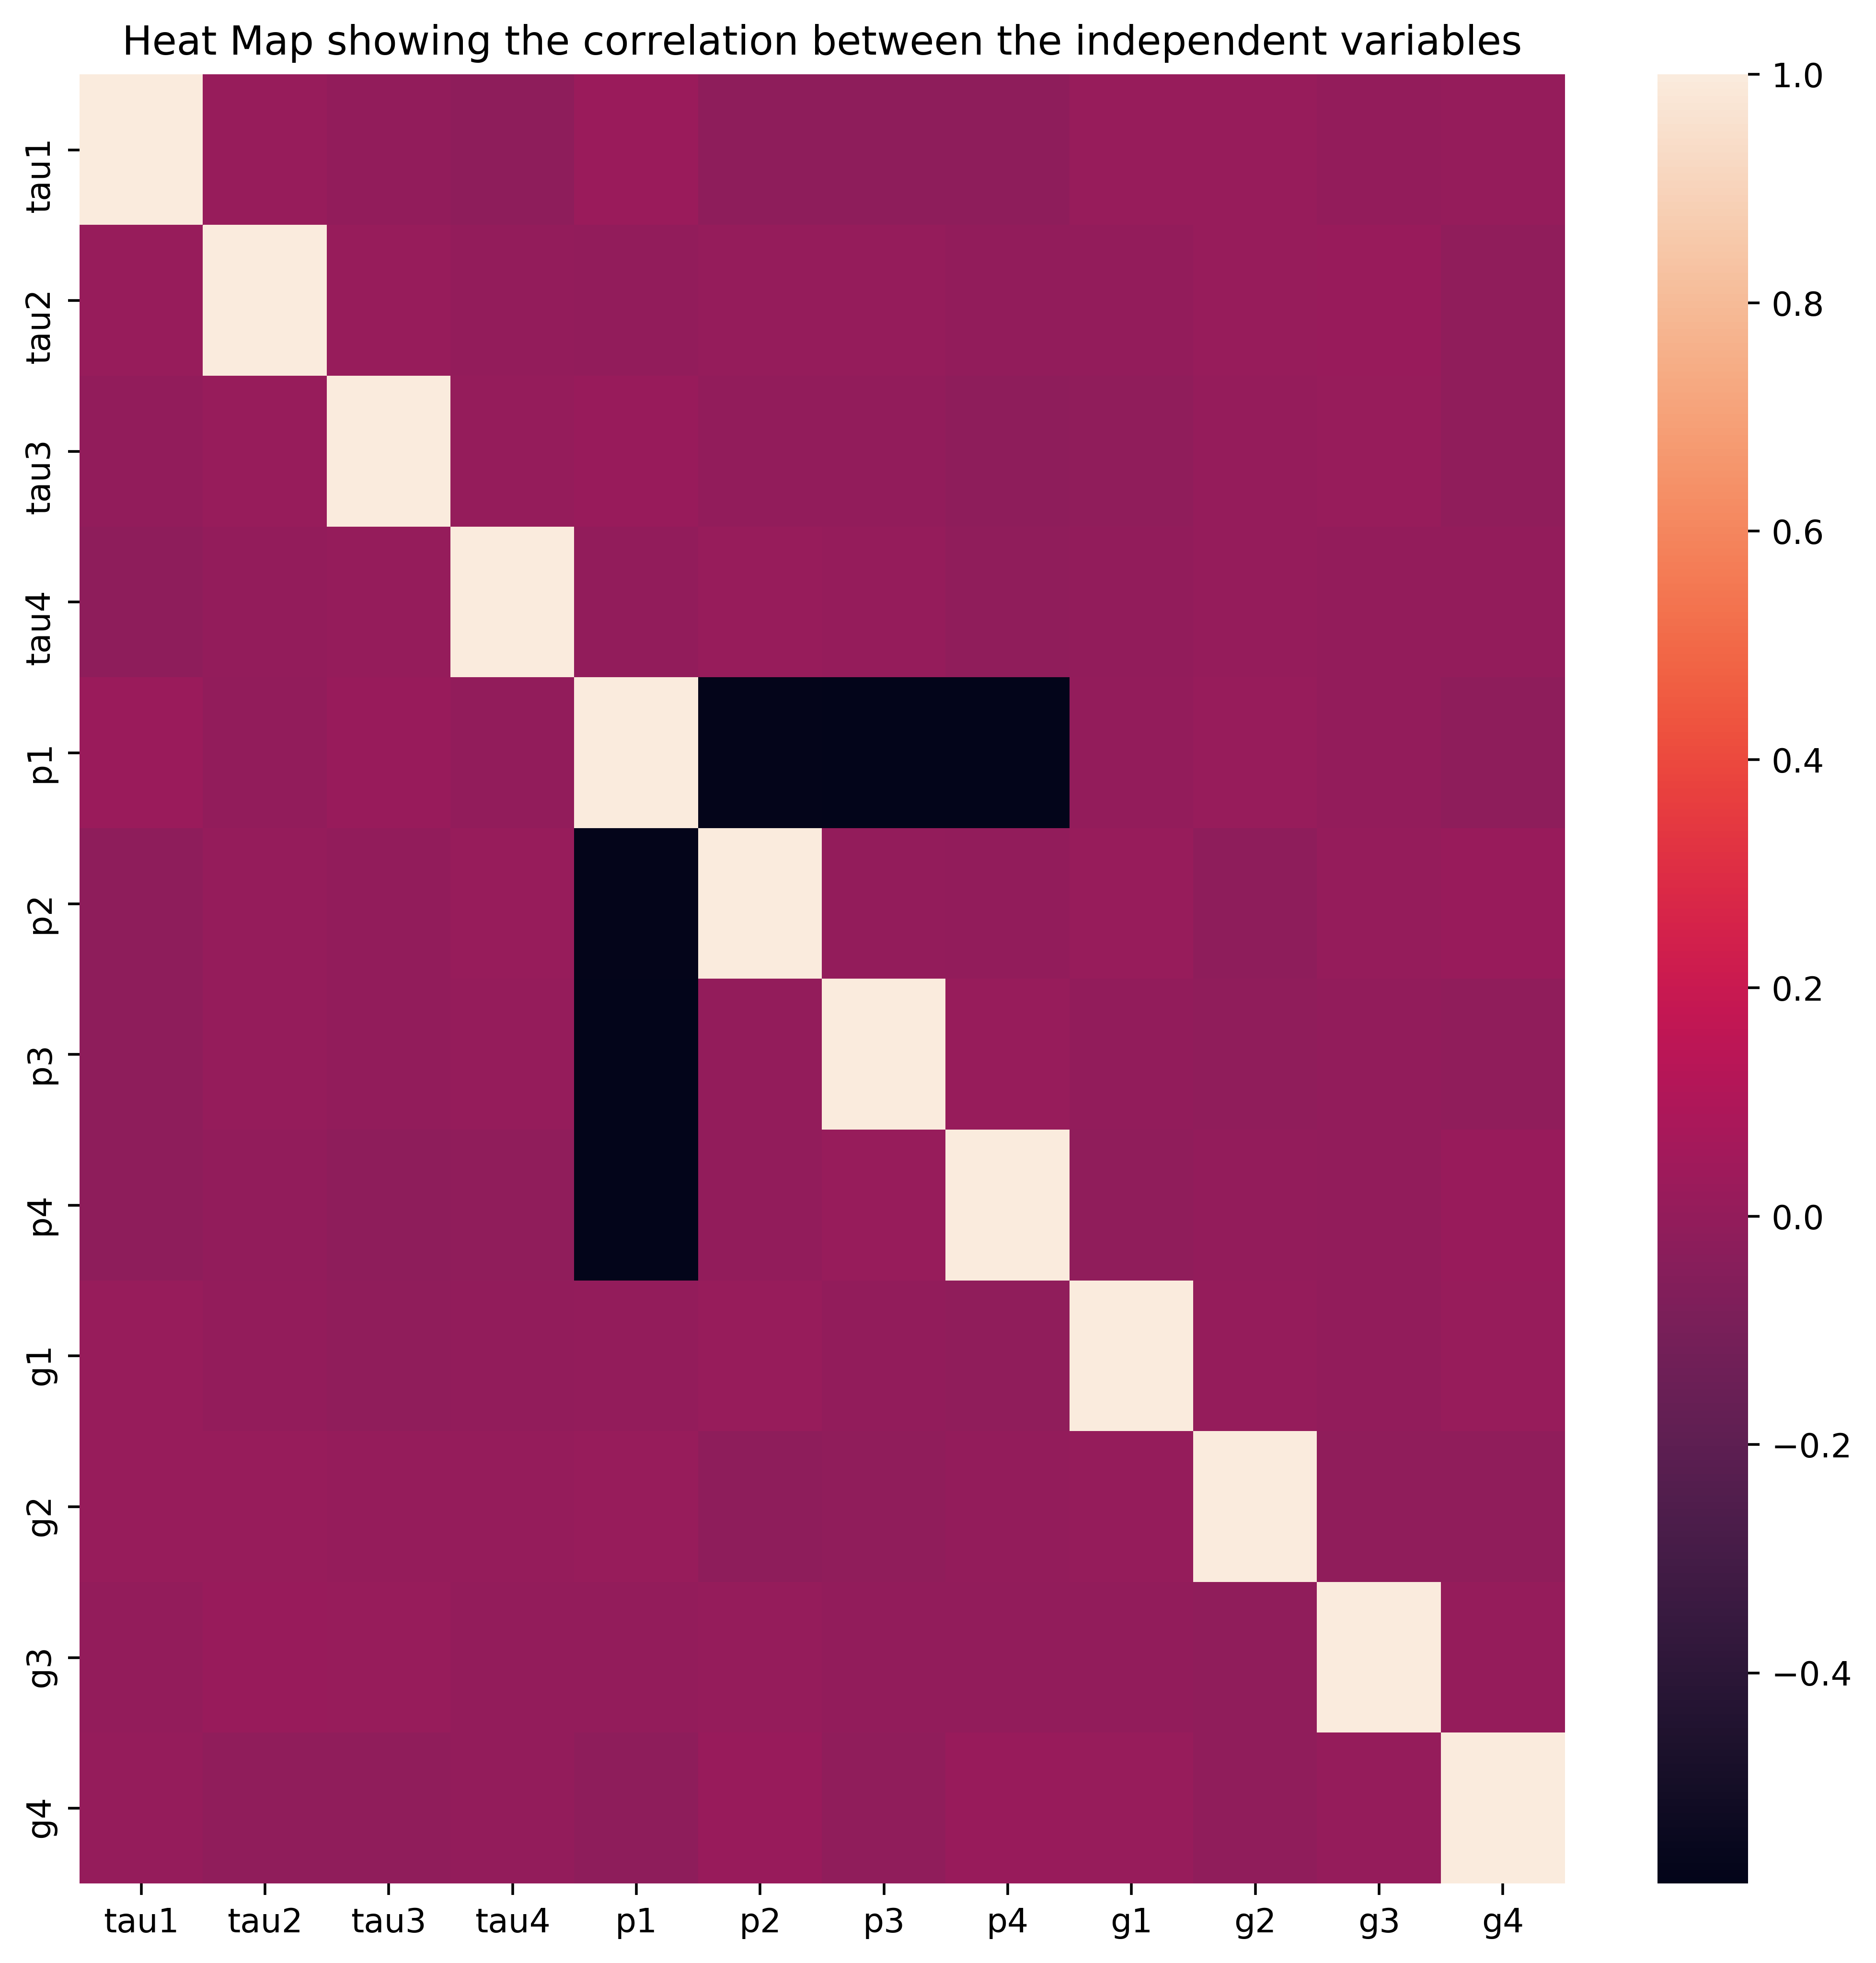

In [8]:
df.corr()
plt.figure(figsize=(10,10),dpi=500)
sns.heatmap(df.corr())
plt.title('Heat Map showing the correlation between the independent variables')

##### 2.9 Checking the correlation values of the correlation matrix

In [9]:
df.corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909


### 3. Feature Engineering

In [10]:
from sklearn.preprocessing import LabelEncoder

##### 3.1 Encoding the categorical dependent variable

In [11]:
encoder=LabelEncoder()

In [12]:
stabf=encoder.fit_transform(df['stabf'])

In [13]:
df['stabf']=stabf

In [14]:
df['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [15]:
X=df.drop('stabf',axis=1)
y=df['stabf']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### 3.2 Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
X_train=scaler.fit_transform(X_train,y_train.values.reshape(-1,1))

In [21]:
X_test=scaler.transform(X_test)

### 4. Building Machine Learning Models

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

##### 4.1 Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier #Importing the Random Forest Classifier

In [24]:
rfc=RandomForestClassifier(random_state=1)

In [25]:
rfc.fit(X_train,y_train) #Fitting the model

RandomForestClassifier(random_state=1)

In [26]:
rfc_pred=rfc.predict(X_test) #Predicting off the X_test

In [27]:
print(classification_report(y_test,rfc_pred)) #Classification Report

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [28]:
print(confusion_matrix(y_test,rfc_pred)) #Confusion Matrix

[[ 625   87]
 [  55 1233]]


In [29]:
from sklearn.metrics import accuracy_score

In [30]:

round(accuracy_score(y_test,rfc_pred),4)

0.929

#####  4.2 Extra Trees Classifier

To improve the extra tree classifier

number of estimators, n_estimators=[50,100,300,500,1000]

minimum number of samples, min_samples_split=[2,3,5,7,9]

minimum number of samples for leaf node, min_samples_leaf=[1,2,4,6,8]

number of features to consider when looking for the best split, max_features=['auto','sqrt','log2',None]


<b>RandomizedSearchCV</b>

hyperparameter_grid={'n_estimators':n_estimators,

                     'min_samples_leaf':min_samples_leaf,
                     
                     'min_samples_split':min_samples_split,
                     
                     'max_features':max_features}

In [31]:
from sklearn.model_selection import RandomizedSearchCV #Importing RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier # Importing the Extra Trees Classifier

In [32]:
n_estimators=[50,100,300,500,1000]
min_samples_split=[2,3,5,7,9]
min_samples_leaf=[1,2,4,6,8]
max_features=['auto','sqrt','log2',None]

In [33]:
hyperparameter_grid={'n_estimators':n_estimators,
                     'min_samples_leaf':min_samples_leaf,
                     'min_samples_split':min_samples_split,
                     'max_features':max_features}

In [34]:
etc=ExtraTreesClassifier() #Instantiating the Extra Trees Classifier

In [35]:
random_search=RandomizedSearchCV(etc,cv=5,n_iter=10,scoring='accuracy',n_jobs=-1,verbose=1,param_distributions=hyperparameter_grid,random_state=1) #Instantiating ths Random Search

In [36]:
random_search.fit(X_train,y_train) #Fittiing the Random Search

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [37]:
random_search.best_estimator_ #Finding the best estimator

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000)

In [38]:
random_search.best_params_ #Finding the best parameters

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [39]:
etcl=ExtraTreesClassifier(n_estimators=300,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='log2',random_state=1) #Instantaiting the Extra Trees Classifier with the selected hyperparameters

In [40]:
etcl.fit(X_train,y_train) #Fitting the Extra Tree Classifier

ExtraTreesClassifier(max_features='log2', n_estimators=300, random_state=1)

In [41]:
etcl_pred=etcl.predict(X_test) #Predicting off the X_test

In [42]:
print(classification_report(y_test,etcl_pred)) #Classification Report

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       712
           1       0.92      0.98      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.92      0.93      2000
weighted avg       0.94      0.94      0.93      2000



In [43]:
print(confusion_matrix(y_test,etcl_pred)) #Confusion Matrix

[[ 603  109]
 [  20 1268]]


In [44]:
accuracy_score(y_test,etcl_pred)

0.9355

In [45]:
optimized_etcl=ExtraTreesClassifier(n_estimators=1000,
 min_samples_split=2,
 min_samples_leaf=8,
 max_features=None,random_state=1)

In [46]:
optimized_etcl.fit(X_train,y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [47]:
opt_pred=optimized_etcl.predict(X_test)

In [48]:
print(classification_report(y_test,opt_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       712
           1       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [49]:
print(confusion_matrix(y_test,opt_pred))

[[ 619   93]
 [  53 1235]]


In [50]:
accuracy_score(y_test,opt_pred)

0.927

##### 4.3 Extreme Gradient Boosting 

In [51]:
import xgboost #Importing XGBoost

In [52]:
xgb=xgboost.XGBClassifier(random_state=1) #Instantiating the XGBoost

In [53]:
xgb.fit(X_train,y_train) #Fitting the model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb_pred=xgb.predict(X_test) #Predicting off the X_test

In [55]:
print(classification_report(y_test,xgb_pred)) #Classification Report

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [56]:
print(confusion_matrix(y_test,xgb_pred)) #Confusion Matrix

[[ 648   64]
 [  45 1243]]


In [57]:
round(accuracy_score(y_test,xgb_pred),4)

0.9455

##### 4.4 Light Gradient Boosting

In [58]:
from lightgbm import LGBMClassifier #Importing Light Gradient Boosting

In [59]:
lgbm=LGBMClassifier(random_state=1) #Instanting the Light Gradiennt Boosting

In [60]:
lgbm.fit(X_train,y_train) #Fitting the model

LGBMClassifier(random_state=1)

In [61]:
lgbm_pred=lgbm.predict(X_test) #Predicting off the  X_test

In [62]:
print(classification_report(y_test,lgbm_pred)) #classification Report

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       712
           1       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [63]:
print(confusion_matrix(y_test,lgbm_pred)) #Confusion Matrix

[[ 635   77]
 [  48 1240]]


In [64]:
round(accuracy_score(y_test,lgbm_pred),4)

0.9375